In [1]:
import sys
sys.path

['/usr/src/app/notebooks',
 '/usr/src/app',
 '/usr/src/app/gee_lib',
 '/usr/src/app/ex_ante_lib',
 '/usr/src/app/forestry_carbon_arr',
 '/usr/src/app/fastapi-gee-service',
 '/usr/local/lib/python310.zip',
 '/usr/local/lib/python3.10',
 '/usr/local/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/site-packages']

In [2]:
from dotenv import load_dotenv
load_dotenv()


True

In [6]:
from datetime import datetime

import json
import os
import sys

# coredb (main) 30y product
link_growth_model_data_csv = os.getenv('CSV_GROWTH_MODEL')
# here the loaded csv from sheet directly is published with anyone to access the link, ONLY with ONE SHEET, we can set and restrict to Treeo only after login, but we need json api etc
link_allometry_csv_gsheet = os.getenv('CSV_ALLOMETRY_FORMULA')

current_path = os.getcwd()
os.makedirs('01_output', exist_ok=True)
os.makedirs('01_output/ex_ante', exist_ok=True)

json_config_relpath = '01_output/00_ex_ante_result/test_main.json'
json_config_abspath = os.path.join(current_path,json_config_relpath)
growth_csv_abs_path = os.path.join(current_path, '01_output/ex_ante/growth_model_2025-10-31.csv')
allometry_csv_abs_path = os.path.join(current_path,'01_output/ex_ante/allometry_model_2025-10-31.csv')

In [7]:
# !cd 01_output && ls

In [8]:
from exante import ExAnteCalc

ex_ante = ExAnteCalc(json_path_config = json_config_abspath, first_run=False, re_select_growth_data=False, # re_downlaod_growth_data you need to check .env to which link
                     download_csv=False, # in .env
                    growth_csv = growth_csv_abs_path, 
                    allometry_csv = allometry_csv_abs_path,
                    link_allometry=link_allometry_csv_gsheet,
                    link_growth=link_growth_model_data_csv,
                    name_column_species_allo= 'Lat. Name', 
                    name_column_species_growth = 'Tree Species(+origin of allom. formula)')


reading from the CSV: /usr/src/app/notebooks/01_output/ex_ante/allometry_model_2025-10-31.csv
reading from the CSV: /usr/src/app/notebooks/01_output/ex_ante/growth_model_2025-10-31.csv
num species based on allometry data 83
num species based on growth data 63
merging allometry + growth db species into unique
num species unique based on all data 98
here are the list of species does not have the info of allometry formula,               
 but has the info of growth data: 
  ['Picea abies', 'Quercus pubescens', 'Abies Alba', 'Anthocephalus cadamba | White Jabon - Bonita III', 'Swietenia Macrophylla | Mahagoni', 'Anthocephalus cadamba | White Jabon - Bonita IV', 'Anthocephalus cadamba | White Jabon - Bonita II', 'Cocos nucifera L|Coconut', 'Carpinus orientalis', 'Anthocephalus cadamba | White Jabon - Bonita I', 'Anthocephalus cadamba | White Jabon - Bonita V', 'Peronema canescens | Sungkai - IDN, Kalimantan', 'Afzelia africana | African Oak', 'Gmelina arborea | Gmelina - IDN', 'Alstonia sch

,Lat. Name,Country of Use,"Allometric Formula, Type","TTB formula, tdm",WD variable,zone
0,Paraserianthes falcataria | Sengon - Central K...,Indonesia,DBH based (only),TTB=(0.08062*DBH^2.36816)*1.2/1000,0.00,production_zone
1,Tectona grandis | Teak - Central Java,Indonesia,DBH based (only),TTB=(0.133*DBH^2.394)/1000,0.00,production_zone
2,Durio zibethinus | Durian - IDN,Indonesia,DBH & WD based,TTB=(0.11*WD*DBH^2.62*1.2/1000),0.57,protected_zone
3,Hevea brasiliensis | Rubber,Indonesia,DBH based (only),TTB= (1.2*0.0124*DBH^2.444)/1000,0.00,protected_zone


,Tree Species(+origin of allom. formula),year,DBH,Height
0,Durio zibethinus | Durian - IDN,1,1.87,NaN
1,Durio zibethinus | Durian - IDN,2,3.73,NaN
2,Durio zibethinus | Durian - IDN,3,5.60,NaN
3,Durio zibethinus | Durian - IDN,4,7.47,NaN
4,Durio zibethinus | Durian - IDN,5,9.33,NaN
...,...,...,...,...
115,Tectona grandis | Teak - Central Java,26,23.04,NaN
116,Tectona grandis | Teak - Central Java,27,23.70,NaN
117,Tectona grandis | Teak - Central Java,28,24.34,NaN
118,Tectona grandis | Teak - Central Java,29,24.99,NaN


,Plot_ID,Plot_Name,zone,area_ha,is_replanting,year_start,mu,Paraserianthes falcataria | Sengon - Central Kalimantan_num_trees,Tectona grandis | Teak - Central Java_num_trees,Durio zibethinus | Durian - IDN_num_trees,Hevea brasiliensis | Rubber_num_trees
0,1,general,protected_zone,50.0,False,1,MU_1_1,0,0,1000,1000
1,2,general,protected_zone,50.0,False,2,MU_1_1,0,0,1000,1000
2,3,general,production_zone,50.0,False,1,MU_1_1,1000,1000,0,0
3,4,general,production_zone,50.0,False,2,MU_1_1,1000,1000,0,0


{'non_replanting': {'production_zone': {'Paraserianthes falcataria | Sengon - Central Kalimantan': {'frequency_manual_thinning': 0,
                                                                                                    'harvesting_year': 10,
                                                                                                    'mortality_percent': 20.0,
                                                                                                    'natural_thinning': 5.0},
                                        'Tectona grandis | Teak - Central Java': {'frequency_manual_thinning': 0,
                                                                                  'harvesting_year': 10,
                                                                                  'mortality_percent': 20.0,
                                                                                  'natural_thinning': 5.0}},
                    'protected_zone': {'Durio zibethinu

In [9]:
growth_melt = ex_ante.growth_df
allometry_df = ex_ante.allometry_df

In [10]:
# growth_melt
# allometry_df

In [11]:
import pandas as pd
self = ex_ante
# create a cleaned_list_species based on csu_seedling to get the info of is_replanting, zone, species_list that has >0 num_trees
df_melted = pd.melt(self.csu_seedling,
                id_vars=['is_replanting', 'zone'], # Replace with your actual ID columns
                value_vars=[col for col in self.csu_seedling.columns if col.endswith('_num_trees')],
                var_name=self.name_column_species_allo,
                value_name='num_trees')

# Filter rows where num_trees > 0
cleaned_list_species = df_melted[df_melted['num_trees'] > 0].copy()

# Remove '_num_trees' suffix from species name column
cleaned_list_species[self.name_column_species_allo] = cleaned_list_species[self.name_column_species_allo].str.replace('_num_trees', '', regex=False)

# Set index to ('is_replanting', 'zone') as requested
cleaned_list_species = cleaned_list_species.set_index(['is_replanting', 'zone'])

# Sort by 'is_replanting' for ordered output
cleaned_list_species = cleaned_list_species.sort_index(level='is_replanting', ascending=True)

# Drop duplicates based on the species name column while keeping index context
# cleaned_list_species = cleaned_list_species[~cleaned_list_species.duplicated(subset=[self.name_column_species_allo])]
cleaned_list_species = cleaned_list_species.drop(columns=('num_trees'))

display(cleaned_list_species)

Lat. Name
is_replanting zone                                                              
False         production_zone  Paraserianthes falcataria | Sengon - Central K...
              production_zone  Paraserianthes falcataria | Sengon - Central K...
              production_zone              Tectona grandis | Teak - Central Java
              production_zone              Tectona grandis | Teak - Central Java
              protected_zone                     Durio zibethinus | Durian - IDN
              protected_zone                     Durio zibethinus | Durian - IDN
              protected_zone                         Hevea brasiliensis | Rubber
              protected_zone                         Hevea brasiliensis | Rubber

In [12]:
# get the whole plot calculation based on csi tree c-sink requirement (e.g > 40% retained tco2)
all_df_merged = ex_ante.csi_plot_model()


now we will choose the csv file
('production_zone', 3, False, 1) {'Paraserianthes falcataria | Sengon - Central Kalimantan': {'harvesting_year': 10, 'mortality_percent': 20.0, 'natural_thinning': 5.0, 'frequency_manual_thinning': 0}, 'Tectona grandis | Teak - Central Java': {'harvesting_year': 10, 'mortality_percent': 20.0, 'natural_thinning': 5.0, 'frequency_manual_thinning': 0}}
('production_zone', 4, False, 2) {'Paraserianthes falcataria | Sengon - Central Kalimantan': {'harvesting_year': 10, 'mortality_percent': 20.0, 'natural_thinning': 5.0, 'frequency_manual_thinning': 0}, 'Tectona grandis | Teak - Central Java': {'harvesting_year': 10, 'mortality_percent': 20.0, 'natural_thinning': 5.0, 'frequency_manual_thinning': 0}}
('protected_zone', 1, False, 1) {'Durio zibethinus | Durian - IDN': {'harvesting_year': 30, 'mortality_percent': 20.0, 'natural_thinning': 5.0, 'frequency_manual_thinning': 0}, 'Hevea brasiliensis | Rubber': {'harvesting_year': 30, 'mortality_percent': 20.0, 'natu

,Plot_ID_exante,is_replanting,year_start,managementUnit,plotZone
0,1,False,1,MU_1_1,protected_zone
1,2,False,2,MU_1_1,protected_zone
2,3,False,1,MU_1_1,production_zone
3,4,False,2,MU_1_1,production_zone


here: 


,Plot_ID_exante,Plot_Name,plotZone,area_ha,is_replanting,year_start,managementUnit,avgtrees_per_ha,species_suf,num_trees,...,allowed_cut_proportion_okay,allowed_cut_csu,total_tCO2e_harvest_cycle_csu,tCO2e_harvest_allowed_species,num_trees_harvested,num_trees_retained,tCO2e_retained,remnant_level,tco2_per_tree,num_trees_adjusted
536,1,general,protected_zone,50.0,False,1,MU_1_1,40.0,Durio zibethinus | Durian - IDN_num_trees,1000.0,...,False,0.0,NaN,NaN,0.0,800,0.534728,0.0,0.000668,800.0
566,1,general,protected_zone,50.0,False,1,MU_1_1,40.0,Hevea brasiliensis | Rubber_num_trees,1000.0,...,False,0.0,NaN,NaN,0.0,800,0.300709,0.0,0.000376,800.0
0,3,general,production_zone,50.0,False,1,MU_1_1,40.0,Paraserianthes falcataria | Sengon - Central K...,1000.0,...,False,0.0,NaN,NaN,0.0,800,1.606316,0.0,0.002008,800.0
10,3,general,production_zone,50.0,False,1,MU_1_1,40.0,Tectona grandis | Teak - Central Java_num_trees,1000.0,...,False,0.0,NaN,NaN,0.0,800,0.250923,0.0,0.000314,800.0
596,2,general,protected_zone,50.0,False,2,MU_1_1,40.0,Durio zibethinus | Durian - IDN_num_trees,1000.0,...,False,0.0,NaN,NaN,0.0,800,0.534728,0.0,0.000668,800.0
625,2,general,protected_zone,50.0,False,2,MU_1_1,40.0,Hevea brasiliensis | Rubber_num_trees,1000.0,...,False,0.0,NaN,NaN,0.0,800,0.300709,0.0,0.000376,800.0
278,4,general,production_zone,50.0,False,2,MU_1_1,40.0,Paraserianthes falcataria | Sengon - Central K...,1000.0,...,False,0.0,NaN,NaN,0.0,800,1.606316,0.0,0.002008,800.0
288,4,general,production_zone,50.0,False,2,MU_1_1,40.0,Tectona grandis | Teak - Central Java_num_trees,1000.0,...,False,0.0,NaN,NaN,0.0,800,0.250923,0.0,0.000314,800.0


MultiIndex([('num_trees', 2026),
            ('num_trees', 2027)],
           names=[None, 'year'])


year                                                                                                                                                                           \
year_start  is_replanting plotZone        managementUnit Plot_ID_exante species                                                                                                 
1           False         production_zone MU_1_1         3              Paraserianthes falcataria | Sengon - Central Ka...  Paraserianthes falcataria | Sengon - Central K...   
                                                                        Tectona grandis | Teak - Central Java                           Tectona grandis | Teak - Central Java   
                          protected_zone  MU_1_1         1              Durio zibethinus | Durian - IDN                                       Durio zibethinus | Durian - IDN   
                                                                        Hevea brasiliensis | Rubber                                               Hevea brasiliensis | Rubber   
2           False         production_zone MU_1_1         4              Paraserianthes falcataria | Sengon - Central Ka...  Paraserianthes falcataria | Sengon - Central K...   
                                                                        Tectona grandis | Teak - Central Java                           Tectona grandis | Teak - Central Java   
                          protected_zone  MU_1_1         2              Durio zibethinus | Durian - IDN                                       Durio zibethinus | Durian - IDN   
                                                                        Hevea brasiliensis | Rubber                                               Hevea brasiliensis | Rubber   
Grand Total                                                                                                                                                               NaN   

year                                                                                                                          2025  \
year_start  is_replanting plotZone        managementUnit Plot_ID_exante species                                                      
1           False         production_zone MU_1_1         3              Paraserianthes falcataria | Sengon - Central Ka...  1000.0   
                                                                        Tectona grandis | Teak - Central Java               1000.0   
                          protected_zone  MU_1_1         1              Durio zibethinus | Durian - IDN                     1000.0   
                                                                        Hevea brasiliensis | Rubber                         1000.0   
2           False         production_zone MU_1_1         4              Paraserianthes falcataria | Sengon - Central Ka...     NaN   
                                                                        Tectona grandis | Teak - Central Java                  NaN   
                          protected_zone  MU_1_1         2              Durio zibethinus | Durian - IDN                        NaN   
                                                                        Hevea brasiliensis | Rubber                            NaN   
Grand Total                                                                                                                 4000.0   

year                                                                                                                          2026  \
year_start  is_replanting plotZone        managementUnit Plot_ID_exante species                                                      
1           False         production_zone MU_1_1         3              Paraserianthes falcataria | Sengon - Central Ka...   800.0   
                                                                        Tectona grandis | Teak - Central Java                800.0   
                          protected_zone 

year                                                                                                                        2025  \
year_start  is_replanting plotZone        managementUnit Plot_ID_exante species                                                    
1           False         production_zone MU_1_1         3              Paraserianthes falcataria | Sengon - Central Ka...   0.0   
                                                                        Tectona grandis | Teak - Central Java                0.0   
                          protected_zone  MU_1_1         1              Durio zibethinus | Durian - IDN                      0.0   
                                                                        Hevea brasiliensis | Rubber                          0.0   
2           False         production_zone MU_1_1         4              Paraserianthes falcataria | Sengon - Central Ka...   0.0   
                                                                        Tectona grandis | Teak - Central Java                0.0   
                          protected_zone  MU_1_1         2              Durio zibethinus | Durian - IDN                      0.0   
                                                                        Hevea brasiliensis | Rubber                          0.0   
Grand Total                                                                                                                  0.0   

year                                                                                                                            2026  \
year_start  is_replanting plotZone        managementUnit Plot_ID_exante species                                                        
1           False         production_zone MU_1_1         3              Paraserianthes falcataria | Sengon - Central Ka...  1.606316   
                                                                        Tectona grandis | Teak - Central Java               0.250923   
                          protected_zone  MU_1_1         1              Durio zibethinus | Durian - IDN                     0.534728   
                                                                        Hevea brasiliensis | Rubber                         0.300709   
2           False         production_zone MU_1_1         4              Paraserianthes falcataria | Sengon - Central Ka...       NaN   
                                                                        Tectona grandis | Teak - Central Java                    NaN   
                          protected_zone  MU_1_1         2              Durio zibethinus | Durian - IDN                          NaN   
                                                                        Hevea brasiliensis | Rubber                              NaN   
Grand Total                                                                                                                 2.692677   

year                                                                                                                             2027  \
year_start  is_replanting plotZone        managementUnit Plot_ID_exante species                                                         
1           False         production_zone MU_1_1         3              Paraserianthes falcataria | Sengon - Central Ka...  10.307193   
                                                                        Tectona grandis | Teak - Central Java                3.530464   
                          protected_zone  MU_1_1         1              Durio zibethinus | Durian - IDN                      3.264263   
                                                                        Hevea brasiliensis | Rubber                          1.636304   
2           False         production_zone MU_1_1         4              Paraserianthes falcataria | Sengon - Central Ka...   1.606316   
                                                                        Tectona grandis | T

In [13]:
all_df_merged.columns

Index(['Plot_ID', 'Plot_Name', 'zone', 'area_ha', 'is_replanting',
       'year_start', 'mu', 'avgtrees_per_ha', 'species_suf', 'num_trees',
       'species', 'dbh_max', 'calc_max_density', 'year',
       'proportion_per_trees', 'tCo2e_per_trees_proportion',
       'total_csu_tCO2e_species', 'rotation_year', 'harvest_time',
       'cycle_harvest', 'remnant_trees', 'allowed_cut_proportion_okay',
       'allowed_cut_csu', 'total_tCO2e_harvest_cycle_csu',
       'tCO2e_harvest_allowed_species', 'num_trees_harvested',
       'num_trees_retained', 'tCO2e_retained', 'remnant_level',
       'tco2_per_tree', 'num_trees_adjusted'],
      dtype='object')

In [14]:
ex_ante.graph_species()

interactive(children=(Dropdown(description='column', options=('tCO2e',), value='tCO2e'), Dropdown(description=…

In [15]:
# input cooling creation
from ex_ante.csi_tree.input_cooling_creation import input_cooling

ex_ante.input_gcs = input_cooling(
    all_df_merged,
    ex_ante.growth_melt,
    ex_ante.name_column_species_growth,
    ex_ante.conf_general["planting_year"],
)
file_input = ex_ante.gdrive_input_cs
file_input = os.path.normpath(file_input)
ex_ante.input_gcs.to_csv(file_input, index=False)

2 2026
4 2026


LTA capture : 2584.042084572776
LTA capture - buffer 20% :  2067.233667658221


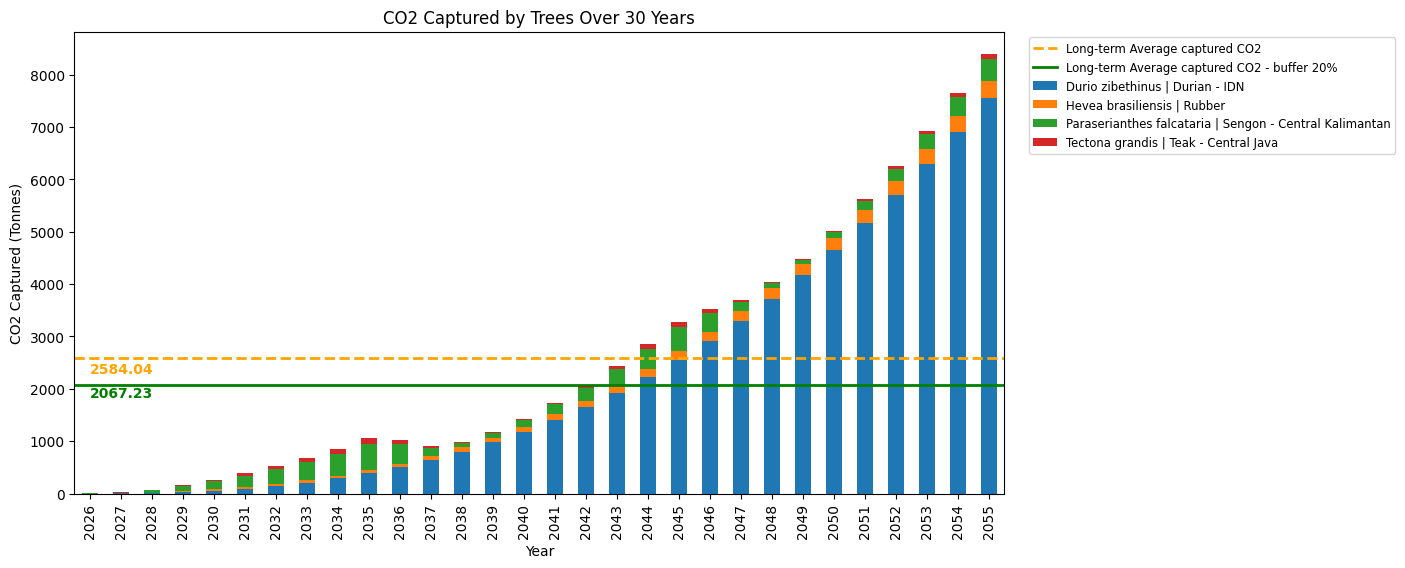

In [16]:
# LTA before baseline
graph_saved_species = os.path.join(os.path.dirname(json_config_abspath), f"graph_species_tCO2stored_{ex_ante.config['project_name']}.png")
ex_ante.graph_species_project(ex_ante.input_gcs, location_save=graph_saved_species)

In [17]:
import pandas as pd

#input_gcs.groupby(['species','measurement_year'])[['co2_tree_captured_tonnes']].sum()
pd.set_option('display.max_columns', None)

pd.pivot_table(
    ex_ante.input_gcs,
    index='species',  # Aggregating by species
    columns='measurement_year',  # Columns will be measurement year
    values='co2_tree_captured_tonnes',  # Values will be the CO2 captured
    aggfunc='sum',  # Summing CO2 values for each species per year
    margins=True,  # Adds grand total for both rows and columns
    margins_name='Grand Total'  # You can rename the 'All' to 'Grand Total'
)

measurement_year,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,Grand Total
species,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Durio zibethinus | Durian - IDN,0.534728,3.798992,12.730137,29.603489,56.195311,94.249159,145.398214,210.785773,291.931062,390.328118,506.662734,642.418721,799.089937,976.924263,1177.458600,1402.261109,1651.126735,1925.702116,2227.680414,2556.376961,2913.590362,3301.177902,3717.944092,4165.873857,4647.021092,5159.646531,5705.950905,6288.212975,6904.116226,7556.103403,65460.893917
Hevea brasiliensis | Rubber,0.300709,1.937013,6.044195,13.311810,24.265263,33.347215,38.844192,44.843791,51.359327,58.403696,65.989415,74.128645,82.833221,92.114677,101.984265,112.452971,123.531538,135.230473,147.560067,160.530405,174.151376,188.432684,203.383858,219.014260,235.333093,252.349409,270.072114,288.509978,307.671634,327.565593,3835.496885
Paraserianthes falcataria | Sengon - Central Kalimantan,1.606316,11.913510,43.012461,95.080913,154.908409,215.648792,280.265619,350.027865,422.021177,491.336471,368.489425,155.229296,85.084796,85.845025,127.971527,186.678573,249.655799,317.241193,387.725313,457.431670,356.427213,164.918999,91.848361,81.808987,114.569777,168.889108,227.481064,290.340228,355.974998,421.204844,6760.637731
Tectona grandis | Teak - Central Java,0.250923,3.781388,10.757413,19.303856,29.994300,42.671078,57.301364,73.847740,92.238713,112.322563,86.184585,36.991233,20.567679,18.309672,25.226132,36.936474,50.610235,66.221943,83.707130,102.944324,81.958375,38.681817,21.995173,17.658283,22.680861,33.447015,46.048177,60.468778,76.648342,94.478439,1464.234004
Grand Total,2.692677,21.430902,72.544206,157.300068,265.363283,385.916245,521.809388,679.505169,857.550279,1052.390848,1027.326159,908.767894,987.575633,1173.193637,1432.640524,1738.329127,2074.924307,2444.395725,2846.672925,3277.283361,3526.127326,3693.211402,4035.171483,4484.355387,5019.604822,5614.332062,6249.552260,6927.531959,7644.411200,8399.352279,77521.262537


In [18]:
### BASELINE - HARDCODED PER YEAR
# from template baseline info -> 
joined_baseline_seq = ex_ante.baseline_calc(input_str='''
-832.4 	  ,-832.4 	  ,-832.4 	  ,-832.4 	  ,-832.4 	  ,-832.4 	  ,-832.4 	  ,-832.4 	  ,-832.4 	 , -832.4 	  ,-832.4 	  ,-832.4 	  ,-832.4 	  ,-832.4 	  ,-832.4 	  ,-832.4 	  ,-832.4 	  ,-832.4 	  ,-832.4 	  ,-832.4 	  ,-832.4 	  ,-832.4 	  ,-832.4 	  ,-832.4 	  ,-832.4 	  ,-832.4 	  ,-832.4 	  ,-832.4 	  ,-832.4 	  ,-832.4
''')

joined_baseline_seq

,measurement_year,co2_tree_captured_tonnes,baseline_tCO2e,net_tCO2e_sequestration
0,2026,2.692677,832.4,-829.707323
1,2027,21.430902,832.4,-810.969098
2,2028,72.544206,832.4,-759.855794
3,2029,157.300068,832.4,-675.099932
4,2030,265.363283,832.4,-567.036717
5,2031,385.916245,832.4,-446.483755
6,2032,521.809388,832.4,-310.590612
7,2033,679.505169,832.4,-152.894831
8,2034,857.550279,832.4,25.150279
9,2035,1052.390848,832.4,219.990848


In [19]:
# csv net tco2e save
table_saved_baseline = os.path.join(os.path.dirname(json_config_abspath), f"table_nettCO2withbaseline_{ex_ante.config['project_name']}.csv")
joined_baseline_seq.to_csv(table_saved_baseline)


LTA : 1401.3136676582208
Baseline average: 832.4000000000002


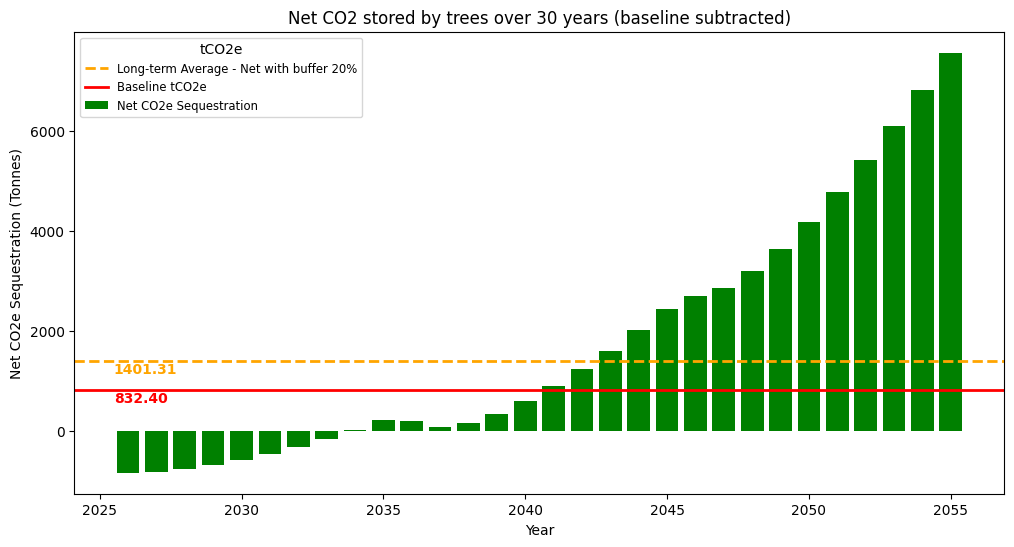

In [20]:
# make sure its the same with
# https://docs.google.com/spreadsheets/d/1JWpg243RmjxJCC7O5eqOrz1H6spTT7YR5oT_J0jIBWU/edit?gid=1016790985#gid=1016790985

graph_saved_baseline = os.path.join(os.path.dirname(json_config_abspath), f"graph_nettCO2withbaseline_{ex_ante.config['project_name']}.png")
ex_ante.graph_seq_baseline(joined_baseline_seq ,location_save=graph_saved_baseline)